# **Project Name**    -



**Zomato Restaurant Clustering and Sentiment Analysis**
##### **Contribution**    - Individual


# **Project Summary -**

The project aims to analyze Zomato restaurant data in India using unsupervised machine learning techniques, specifically clustering and sentiment analysis. Zomato is a popular restaurant aggregator and food delivery platform in India, offering a wide range of cuisines and dining options. By analyzing this data, we can gain valuable insights into customer sentiments and preferences, as well as help both customers and the company make informed decisions.

1. The first step of the project involves collecting and preprocessing the Zomato restaurant data, which includes cleaning the data and extracting relevant features such as restaurant names, cuisines, cost, ratings, and reviews. Next, we perform exploratory data analysis (EDA) to understand the distribution of restaurants across different cities, cuisines, and cost ranges. Visualization techniques are used to identify patterns and insights in the data.

2. For sentiment analysis, we use Natural Language Processing (NLP) techniques to analyze the sentiments of customer reviews. Sentiment scores (positive, negative, neutral) are assigned to each review, allowing us to understand customer opinions and feedback. Additionally, we cluster the Zomato restaurants into different segments based on features like cuisine, cost, ratings, and sentiment scores. Clustering algorithms such as KMeans are applied to group similar restaurants together.

3. The project also includes visualizing the clusters using scatter plots and other techniques to provide a clear understanding of the restaurant segments. Insights and recommendations are derived from the analysis, including recommendations for customers to find the best restaurants in their locality and suggestions for the company to improve and grow in areas where they may be lacking.

4. Overall, this project aims to provide valuable insights into the Indian food industry, help customers make informed dining choices, and assist the company in enhancing its services and offerings.


# **GitHub Link -**

# **Problem Statement**


The project focuses on analyzing Zomato restaurant data in India to provide insights and recommendations for both customers and the company.The main objectives are:

1. Sentiment Analysis: Analyze customer reviews to understand sentiments and opinions about restaurants. This involves assigning sentiment scores (positive, negative, neutral) to each review using NLP techniques.

2. Clustering: Cluster Zomato restaurants into different segments based on features such as cuisine, cost, ratings, and sentiment scores. This will help identify patterns and group similar restaurants together.

3. Visualization: Visualize the clusters and sentiment analysis results using appropriate techniques to provide a clear understanding of the data.

4. Insights and Recommendations: Derive insights from the analysis and provide recommendations for customers to find the best restaurants in their locality and for the company to improve its services and offerings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [148]:
!pip install contractions

In [149]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string
import re
import contractions
# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Dataset Loading

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
# Load Dataset
resto_data = pd.read_csv('/content/drive/MyDrive/mani_data/Zomato Restaurant names and Metadata.csv')
review_data = pd.read_csv('/content/drive/MyDrive/mani_data/Zomato Restaurant reviews.csv')


### Dataset First View

In [152]:
# Dataset First Look
resto_data.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [153]:
resto_data.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [154]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [155]:
# Merging based on a common column
full_data = pd.merge(resto_data, review_data, left_on = 'Name' , right_on='Restaurant', how='outer')
full_data.head()


,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0


### Dataset Rows & Columns count

In [156]:
# Dataset Rows & Columns count
full_data.shape

(10005, 13)

### Dataset Information

In [157]:
# Dataset Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         10005 non-null  object 
 1   Links        10005 non-null  object 
 2   Cost         10005 non-null  object 
 3   Collections  5001 non-null   object 
 4   Cuisines     10005 non-null  object 
 5   Timings      9905 non-null   object 
 6   Restaurant   10000 non-null  object 
 7   Reviewer     9962 non-null   object 
 8   Review       9955 non-null   object 
 9   Rating       9962 non-null   object 
 10  Metadata     9962 non-null   object 
 11  Time         9962 non-null   object 
 12  Pictures     10000 non-null  float64
dtypes: float64(1), object(12)
memory usage: 1016.3+ KB


#### Duplicate Values

In [158]:
# Dataset Duplicate Value Count
# Count the total number of duplicate rows in the entire DataFrame
duplicate_count = full_data.duplicated().sum()

# Display the count of duplicate rows
print(f'Total Duplicate Rows: {duplicate_count}')

Total Duplicate Rows: 36


#### Missing Values/Null Values

In [159]:
# Missing Values/Null Values Count
# Count the total number of missing values in each column
missing_values_count = full_data.isnull().sum()

# Display the count of missing values for each column
print(missing_values_count)

Name              0
Links             0
Cost              0
Collections    5004
Cuisines          0
Timings         100
Restaurant        5
Reviewer         43
Review           50
Rating           43
Metadata         43
Time             43
Pictures          5
dtype: int64


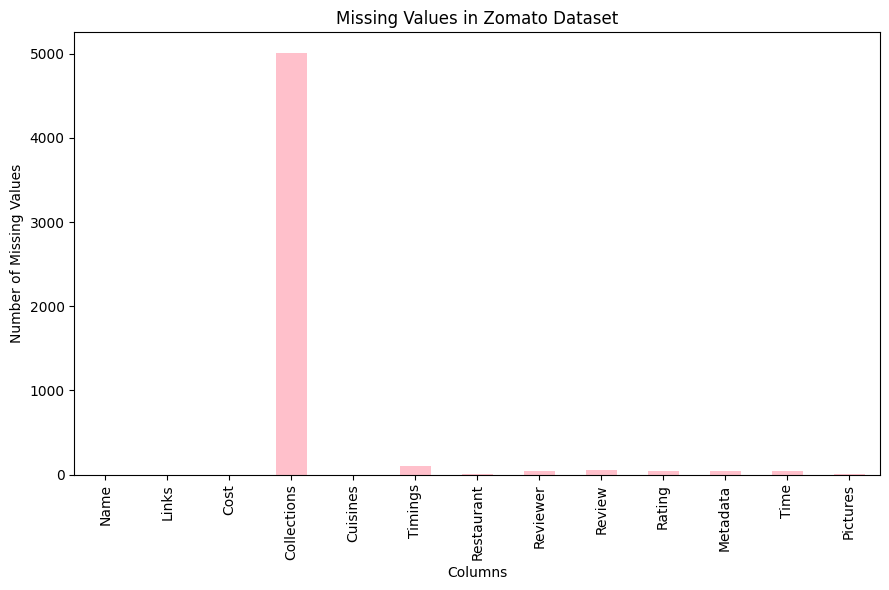

In [160]:
# Visualizing the missing values
missing_values_count = full_data.isnull().sum()
plt.figure(figsize=(9, 6))  # Adjust the figure size if necessary
missing_values_count.plot(kind='bar', color='pink')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Zomato Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping labels
plt.show()

### What did you know about your dataset?

1. The merged dataset has a total of 10005 rows and 13 columns after merging the restaurant data with the review data.
2. There are a total of 36 duplicate values and a significant number of missing values, especially in the 'collection' column, which has 5004 missing values.

## ***2. Understanding Your Variables***

In [161]:
# Dataset Columns
full_data.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [162]:
# Dataset Describe
full_data.describe()


,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description

In [163]:
variable_names = full_data.columns.tolist()
data_types = full_data.dtypes.tolist()
variable_description = pd.DataFrame({'Variable Name': variable_names, 'Data Type': data_types})
print(variable_description)

   Variable Name Data Type
0           Name    object
1          Links    object
2           Cost    object
3    Collections    object
4       Cuisines    object
5        Timings    object
6     Restaurant    object
7       Reviewer    object
8         Review    object
9         Rating    object
10      Metadata    object
11          Time    object
12      Pictures   float64


### Check Unique Values for each variable.

In [164]:
# Check Unique Values for each variable.
# Count unique values in all columns
unique_counts = full_data.nunique()
print("Number of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
Name            105
Links           105
Cost             29
Collections      42
Cuisines         92
Timings          77
Restaurant      100
Reviewer       7446
Review         9364
Rating           10
Metadata       2477
Time           9782
Pictures         36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [165]:
# Changing the Datatype of some of the column
# Replace non-numeric values in 'Rating' column with NaN
full_data['Rating'] = pd.to_numeric(full_data['Rating'], errors='coerce')
# Convert 'Rating' column to float
full_data['Rating'] = full_data['Rating'].astype(float)
full_data['Cost'] = pd.to_numeric(full_data['Cost'].str.replace(',',''), errors='coerce')

In [166]:
# Fill missing values
full_data['Collections'].fillna('Unknown', inplace=True)

In [167]:
# Droping Null Values
full_data.dropna(inplace=True)

In [168]:
# Drop duplicate rows from the DataFrame
full_data = full_data.drop_duplicates()

# Reset the index of the DataFrame
full_data = full_data.reset_index(drop=True)


In [169]:
# Checking Duplicate Counts
duplicate_count = full_data.duplicated().sum()

# Display the count of duplicate rows
print(f'Total Duplicate Rows: {duplicate_count}')

Total Duplicate Rows: 0


In [170]:
# Split 'Metadata' column into two new columns: 'Num_Reviews' and 'Num_Followers'
full_data[['Num_Reviews', 'Num_Followers']] = full_data['Metadata'].str.extract('(\d+) Review[s]* , (\d+) Follower[s]*').fillna(0).astype(int)

# Display the DataFrame with the new columns
print(full_data[['Metadata', 'Num_Reviews', 'Num_Followers']].head())


                  Metadata  Num_Reviews  Num_Followers
0   1 Review , 2 Followers            1              2
1  3 Reviews , 2 Followers            3              2
2  2 Reviews , 3 Followers            2              3
3    1 Review , 1 Follower            1              1
4  3 Reviews , 2 Followers            3              2


In [171]:
# Droping Unnecessary Column
full_data = full_data.drop(['Pictures' , 'Links' , 'Name' , 'Metadata' ], axis=1)


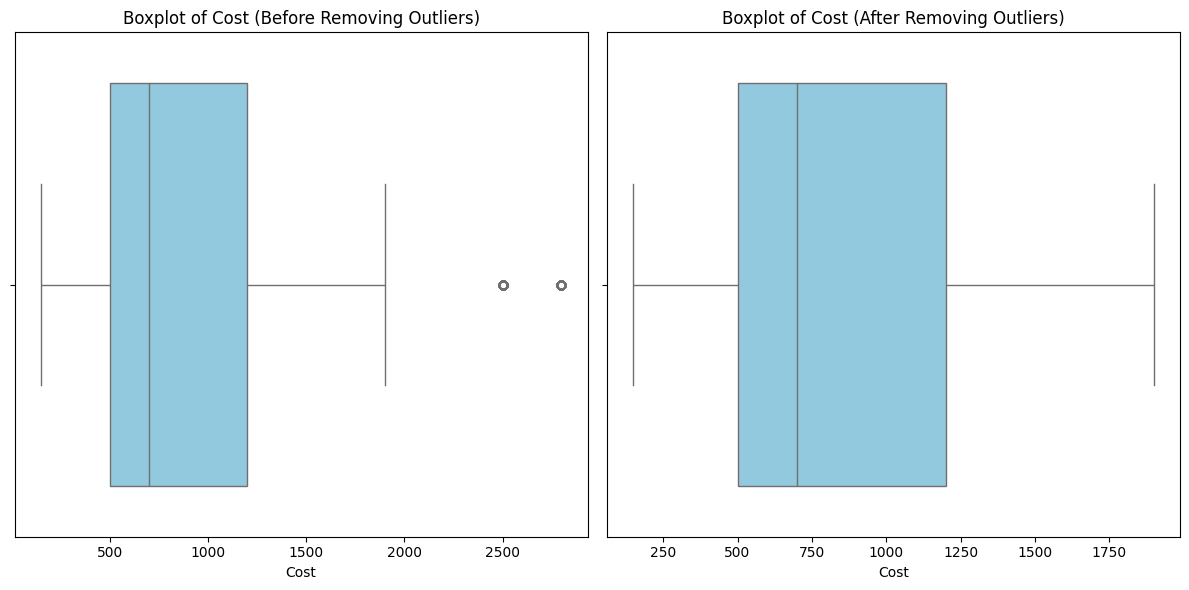

In [172]:
# Outerlier Removal
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Visualization before removing outliers
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title('Boxplot of ' + column + ' (Before Removing Outliers)')

    # Remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Visualization after removing outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_filtered[column], color='skyblue')
    plt.title('Boxplot of ' + column + ' (After Removing Outliers)')

    plt.tight_layout()
    plt.show()

    return df_filtered

# Remove outliers from 'Cost' column
full_data = remove_outliers(full_data, 'Cost')



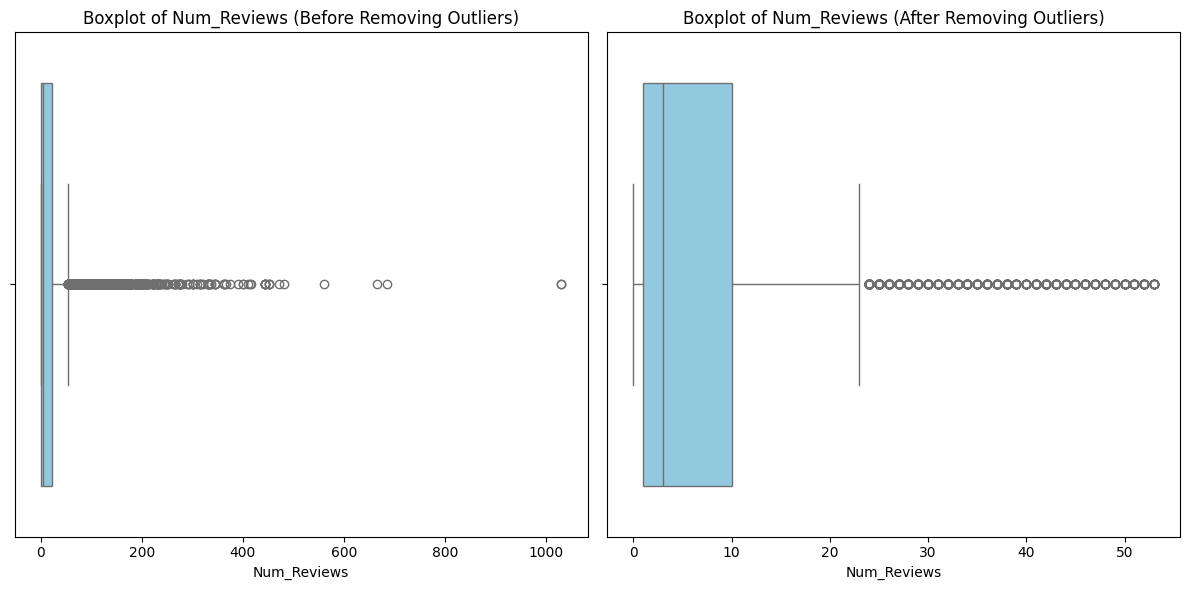

In [173]:
full_data = remove_outliers(full_data, 'Num_Reviews')

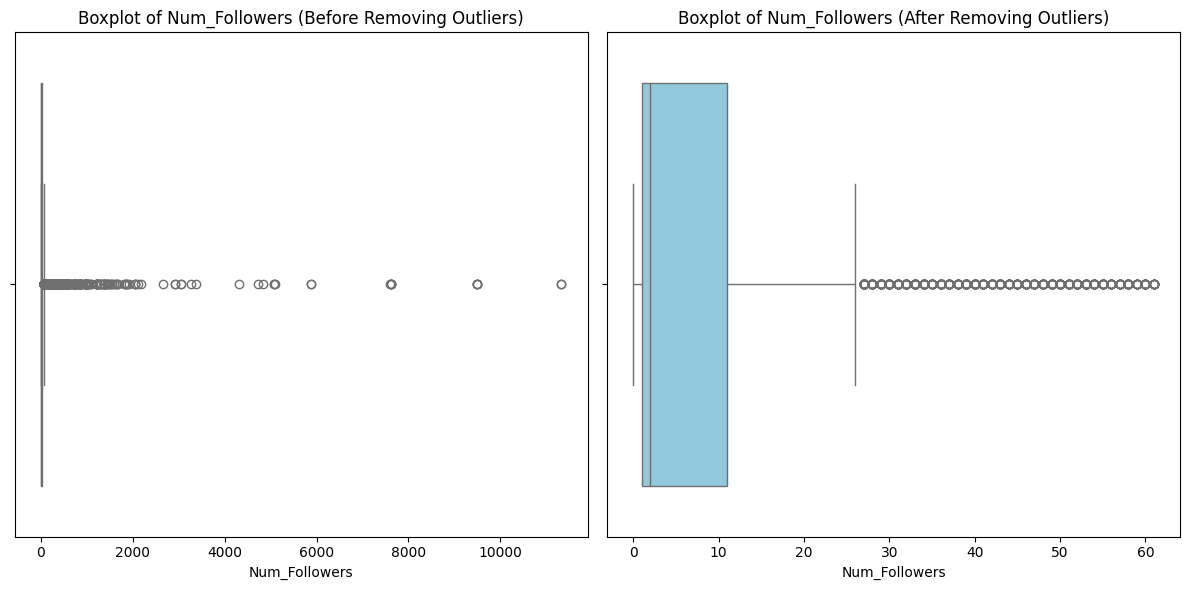

In [174]:
full_data = remove_outliers(full_data, 'Num_Followers')

### What all manipulations have you done and insights you found?

Answer Here.

1. Filled missing values in the 'Collections'columns with 'Unknown'.
2. Computed the correlation matrix for numerical columns.
3. Dropped unnecessary columns like 'Pictures', 'Name' , 'Metadata(after splitting)' and 'Links'.
4. Dropped duplicate rows.
5. Changed the datatype of columns like 'Cost' and 'Rating'.
6. Remove outliers from the 'Cost' column and visualize the data before and after outlier removal.
7. Splitting 'Metadata' column into two new columns: 'Num_Reviews' and 'Num_Followers'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Univariate Analysis

<ipython-input-175-c03da5dd3263>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=full_data, x='Collections', order=full_data['Collections'].value_counts().index , palette='Set3',edgecolor='black')


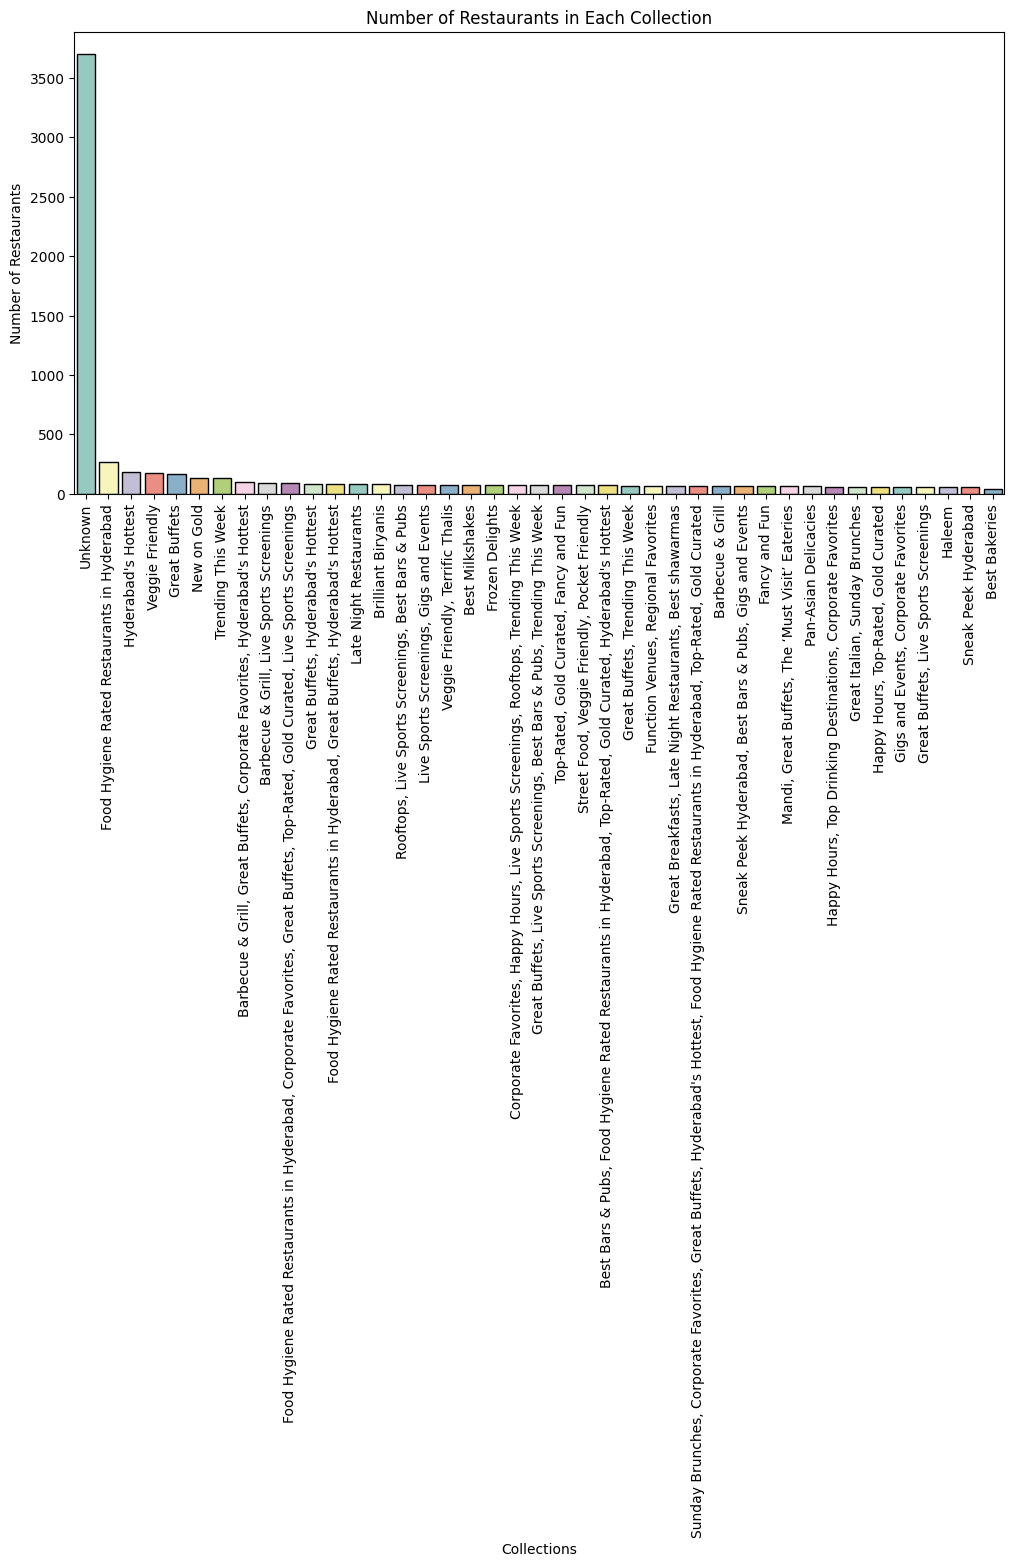

In [175]:
# Number of Restaurants in Each Collection
plt.figure(figsize=(12, 6))
sns.countplot(data=full_data, x='Collections', order=full_data['Collections'].value_counts().index , palette='Set3',edgecolor='black')
plt.title('Number of Restaurants in Each Collection')
plt.xlabel('Collections')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Countplot automatically counts the number of occurrences of each category and plots the corresponding bars. This simplifies the code compared to manually aggregating counts.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

1. Food Hygiene Rated Restaurants:
Indicates a focus on cleanliness and food safety standards.
2. Corporate Favorites:
Suggests popularity among corporate clients, possibly offering business-friendly amenities.
3. Great Buffets:
Shows a demand for buffet-style dining experiences.
4. Hyderabad's Hottest:
Indicates popular or trendy dining options.
5. Trending This Week:
Shows interest in exploring new or trending dining options.
6. Veggie Friendly:
Highlights the importance of vegetarian-friendly options.
7. New on Gold:
Indicates interest in exclusive offers or deals through loyalty programs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


The insights indicate opportunities for positive business impact, such as enhancing hygiene standards, catering to corporate clients, offering attractive buffets, staying on trend, and providing vegetarian options. However, neglecting hygiene, focusing too much on trends, or ignoring customer preferences could lead to negative growth by affecting trust, satisfaction, and long-term success.

#### Chart - 2

Univariate analysis

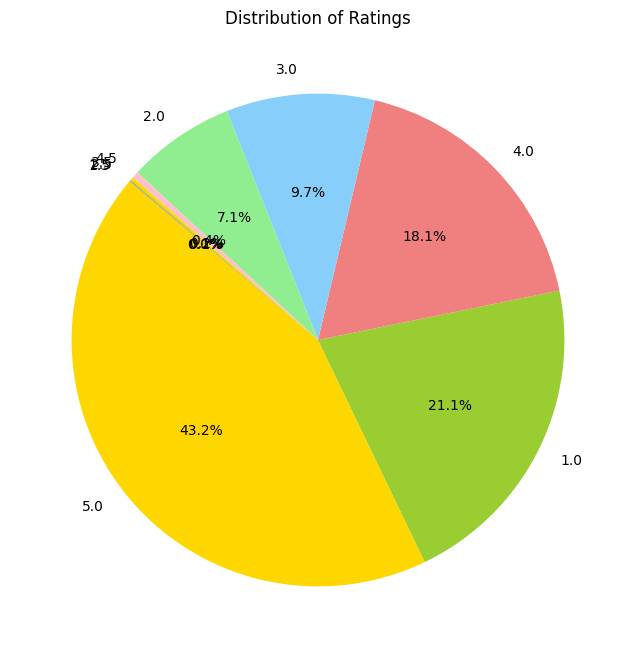

In [176]:
# Calculate the frequency of each rating value
rating_counts = full_data['Rating'].value_counts()

# Create a pie chart with custom colors and labels
plt.figure(figsize=(8, 8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
plt.pie(rating_counts, labels=rating_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A pie chart is used to visually represent the proportions of different categories or parts of a whole in a dataset. It is effective for comparing categories, highlighting dominant categories, and presenting data in a simple and clear manner, especially when there are a limited number of categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insight from the pie chart indicates that ratings of 5 and 4 are more common compared to other ratings. This suggests that a majority of the reviewers have given high ratings to the restaurants in the dataset. This information can be valuable for understanding customer satisfaction levels and identifying areas for improvement in restaurants that received lower ratings.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In short, the insight that ratings of 5 and 4 are more common can positively impact business by attracting more customers and generating positive word-of-mouth. However, there is a risk of negative growth if restaurants become complacent or fail to address areas needing improvement. It is important for restaurants to use this insight to continuously improve and maintain high standards.

#### Chart - 3

Univariate Analysis

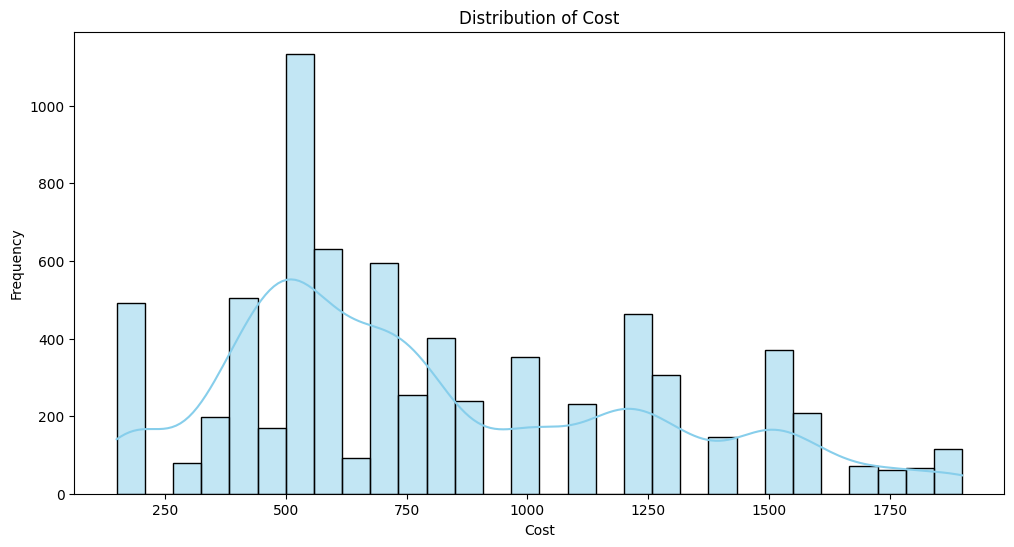

In [177]:
# The distribution of the cost per person across all restaurants in the dataset.
plt.figure(figsize=(12, 6))
sns.histplot(data=full_data, x='Cost', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

A histogram is a graphical representation of the distribution of a dataset. It shows the frequency of values in intervals (bins) along the range of the data. Histograms are used to visualize the shape, center, and spread of the data, as well as to identify outliers or patterns in the distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The graph shows that the majority of restaurants have a cost between 0 and 2000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

1. Setting competitive prices.
2. Targeting marketing efforts effectively.
3. Optimizing costs for improved profitability.

#### Chart - 4

Bivariate Analysis

<ipython-input-178-8ed13e887bdb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_best_rating_restaurants, x='Restaurant', y='Average Rating', palette='Set3')


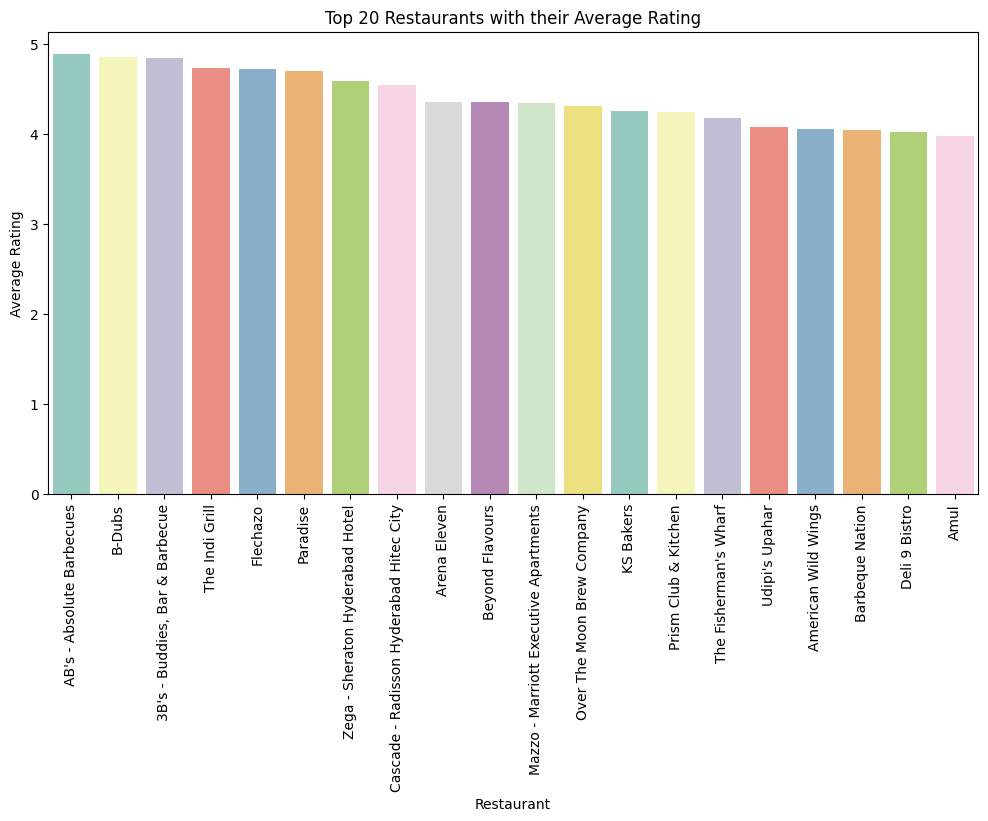

In [178]:
# Top 20 Restaurants with their Average Rating
top_20_best_rating_restaurants = full_data.groupby('Restaurant')['Rating'].mean().nlargest(20).reset_index(name='Average Rating')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_best_rating_restaurants, x='Restaurant', y='Average Rating', palette='Set3')
plt.title('Top 20 Restaurants with their Average Rating')
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts are commonly used to display and compare the values of different categories or groups.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insight from the chart is that there are certain restaurants with exceptionally high average ratings like AB's-Absolute Barbecues ,B-Dubs , 3B's-Buddies,Bar & Barebecue and Paradise etc, indicating that they are highly rated by customers. These restaurants may have a strong reputation for providing excellent food, service, and overall dining experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

1. The gained insights can help create a positive business impact by highlighting the restaurants that are performing exceptionally well in terms of customer satisfaction. This information can be used by these restaurants to further enhance their offerings and attract more customers. Positive reviews and high ratings can also lead to increased visibility and customer trust, which can ultimately drive business growth.
2. However, there is a potential negative implication if other restaurants see a significant gap between their average ratings and those of the top-rated restaurants. This could lead to dissatisfaction among these restaurants and a perception of unfair competition. To address this, restaurants with lower ratings can use the insights to identify areas for improvement and strive to enhance their offerings to compete more effectively.

#### Chart - 5

Bivariate Analysis

<ipython-input-179-b3b9006e3a9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_expensive_restaurants, x='Restaurant', y='Average Cost', palette='Set3')


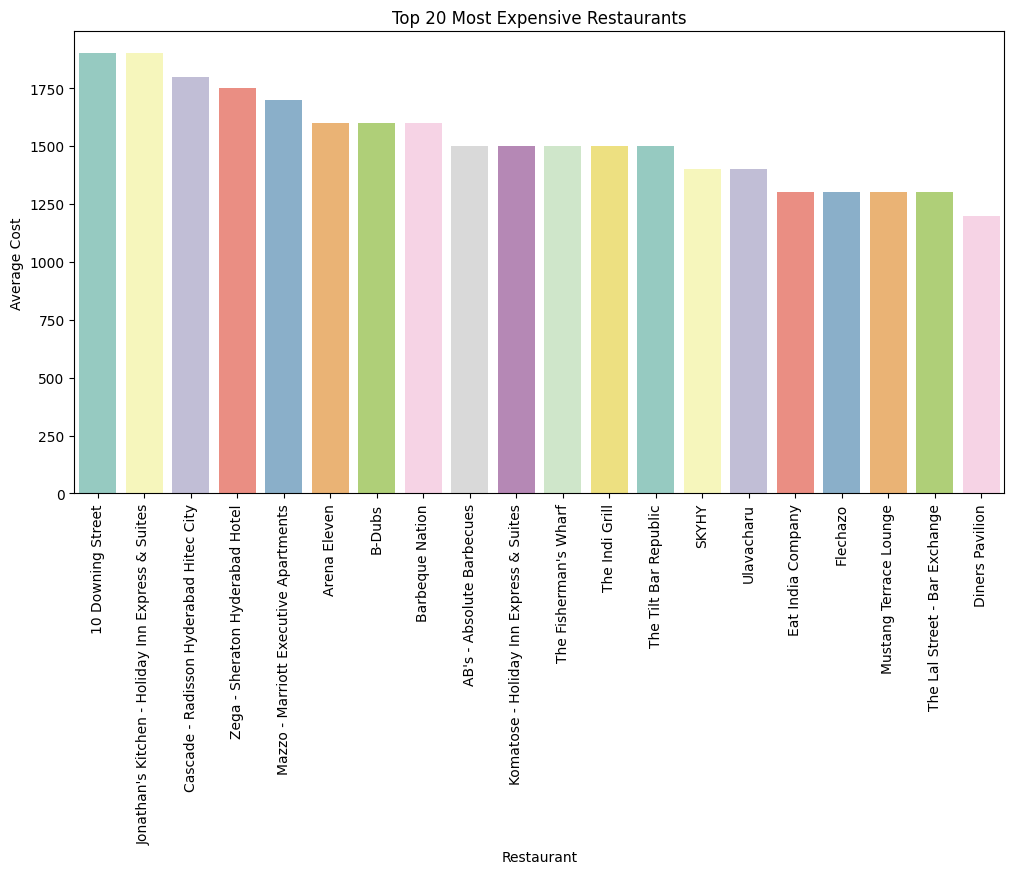

In [179]:
# Top 20 Most Expensive Restaurants
top_20_expensive_restaurants = full_data.groupby('Restaurant')['Cost'].mean().nlargest(20).reset_index(name='Average Cost')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_expensive_restaurants, x='Restaurant', y='Average Cost', palette='Set3')
plt.title('Top 20 Most Expensive Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts are commonly used to display and compare the values of different categories or groups.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart displays the top 20 restaurants with the highest average cost per visit. These restaurants are likely to offer premium dining experiences or specialty cuisines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

1. Positive Business Impact:
Premium Brand Image: Being listed among the top expensive restaurants can enhance a restaurant's brand image, attracting customers looking for high-end dining experiences.
Higher Profit Margins: Higher average costs indicate potential for higher profit margins, especially if the restaurant offers unique or high-quality dishes.
Targeted Marketing: Insights from these top restaurants can help in targeted marketing towards affluent customers who are willing to spend more on dining.

2. Negative Growth:
Customer Perception: If the prices are not justified by the quality of food or experience, it could lead to negative customer reviews and deter future customers.
Competitive Pricing: Other restaurants might use this information to undercut prices, affecting the competitiveness of these top expensive restaurants.

#### Chart - 6

Bivariate Analysis

<ipython-input-180-6272f5f46ef9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_affordable_restaurants, x='Restaurant', y='Average Cost', palette='Set3')


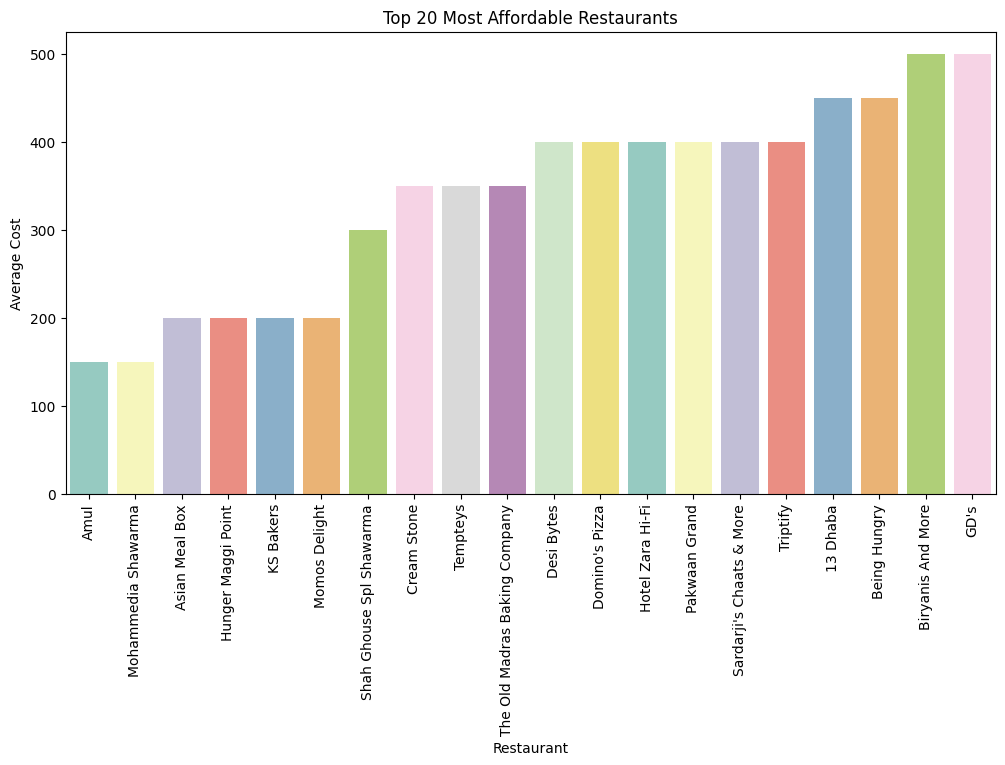

In [180]:
# Top 20 Most Affordable Restaurants
top_20_affordable_restaurants = full_data.groupby('Restaurant')['Cost'].mean().nsmallest(20).reset_index(name='Average Cost')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_affordable_restaurants, x='Restaurant', y='Average Cost', palette='Set3')
plt.title('Top 20 Most Affordable Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.


Bar charts are used to compare different categories or show trends over time using bars of varying heights. They're great for visualizing categorical data, comparing values, showing rankings, and illustrating part-to-whole relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


The chart shows the top 20 most affordable restaurants based on their average cost per visit.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This information can help attract budget-conscious customers and increase foot traffic, especially during economic downturns. However, relying solely on low prices may lead to lower profit margins unless accompanied by other value propositions such as quality food, service, or ambiance.

#### Chart - 7

Bivariate Analysis

<ipython-input-181-8edab2a0c63f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expensive_collections.values, y=top_expensive_collections.index, palette='viridis')


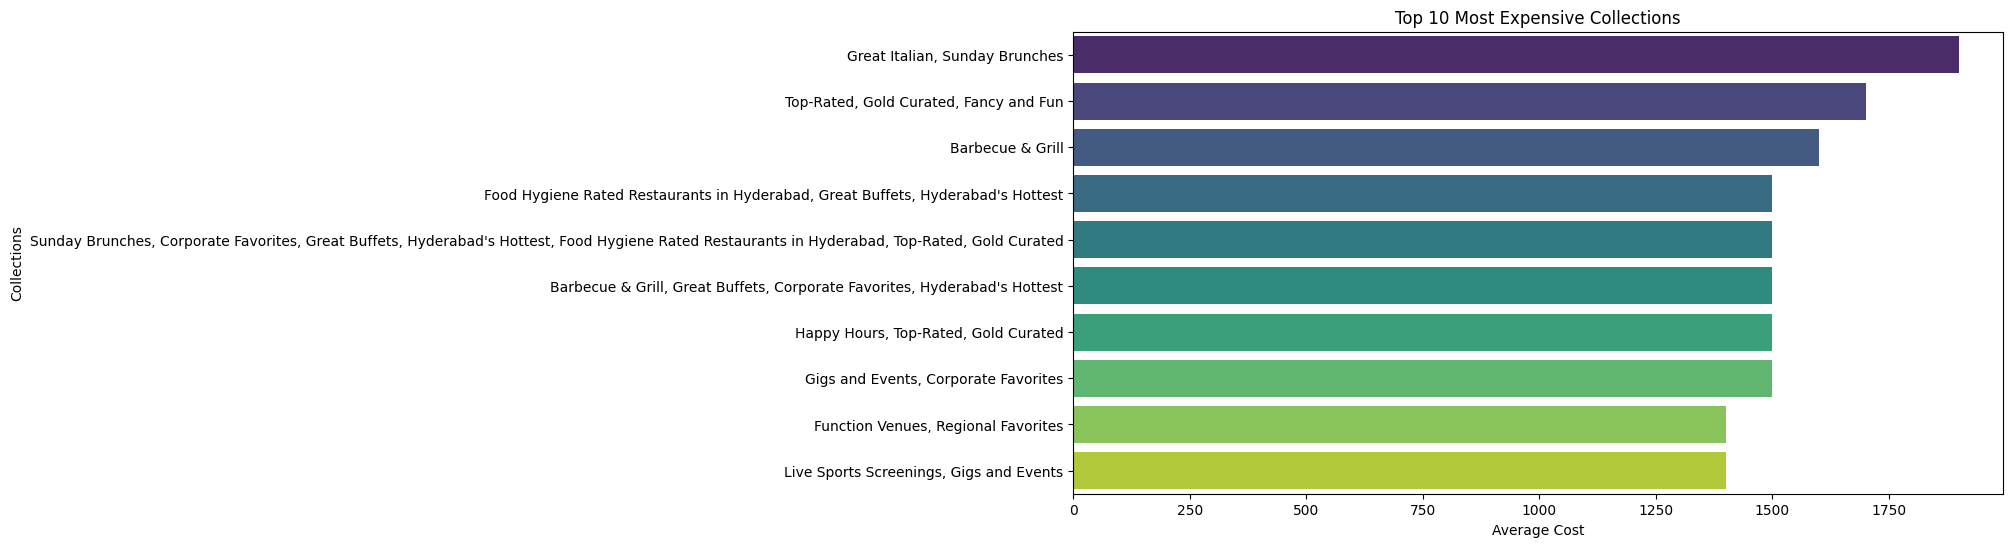

In [181]:
# Top 10 Most Expensive Collections
top_expensive_collections = full_data.groupby('Collections')['Cost'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_expensive_collections.values, y=top_expensive_collections.index, palette='viridis')
plt.title('Top 10 Most Expensive Collections')
plt.xlabel('Average Cost')
plt.ylabel('Collections')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts are used to compare different categories or show trends over time using bars of varying heights. They're great for visualizing categorical data, comparing values, showing rankings, and illustrating part-to-whole relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


The chart displays the top 10 most expensive collections based on the average cost per visit.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This information can help businesses understand the market positioning of these collections and tailor their pricing strategies accordingly. It can also be useful for customers looking for premium dining experiences. However, focusing solely on expensive collections may limit the customer base to those willing to pay higher prices, potentially excluding a larger market segment seeking more affordable options.







#### Chart - 8

Bivariate Analysis

<ipython-input-182-ede23c3c2745>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_affordable_collections.values, y=top_affordable_collections.index, palette='viridis')


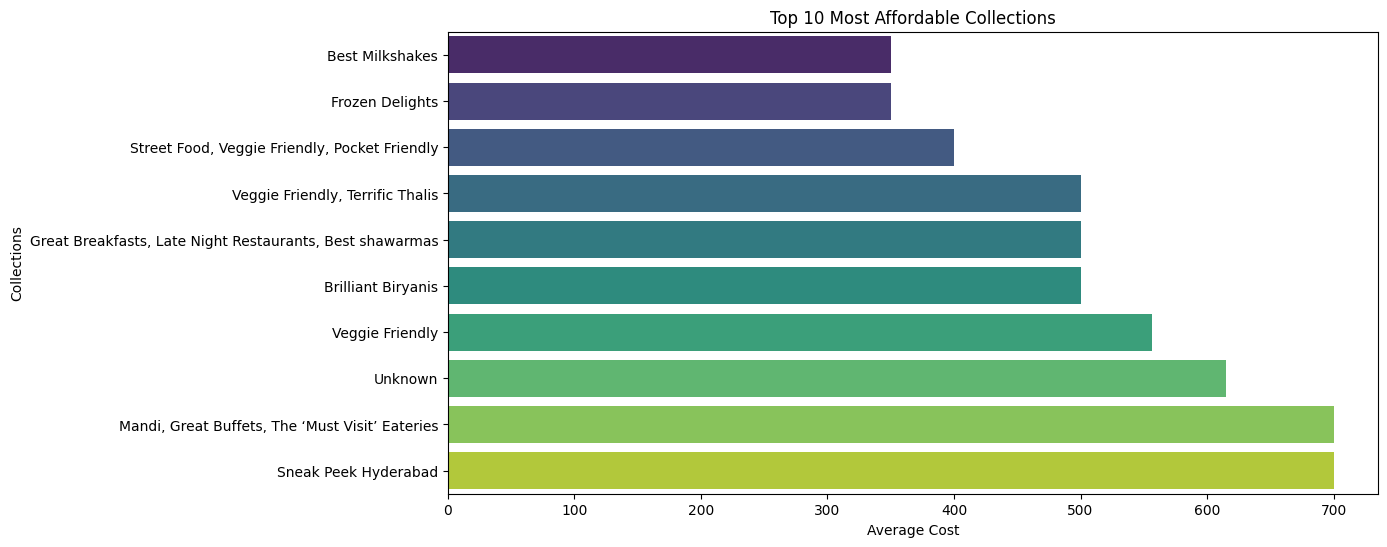

In [182]:
# Top 10 Most Affordable Collections
top_affordable_collections = full_data.groupby('Collections')['Cost'].mean().sort_values().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_affordable_collections.values, y=top_affordable_collections.index, palette='viridis')
plt.title('Top 10 Most Affordable Collections')
plt.xlabel('Average Cost')
plt.ylabel('Collections')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts are used to compare different categories or show trends over time using bars of varying heights. They're great for visualizing categorical data, comparing values, showing rankings, and illustrating part-to-whole relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


The chart shows the top 10 most affordable collections based on the average cost per visit.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This information can be valuable for budget-conscious customers looking for dining options within their price range. For businesses, it can help in attracting a larger customer base by offering affordable dining experiences. However, focusing solely on affordability may lead to lower profit margins if not balanced with other factors such as quality and service. Overall, this insight can help in creating a positive business impact by appealing to a broader range of customers.

#### Chart - 9

Bivariate Analysis

<ipython-input-183-4c8b17c73332>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='coolwarm')


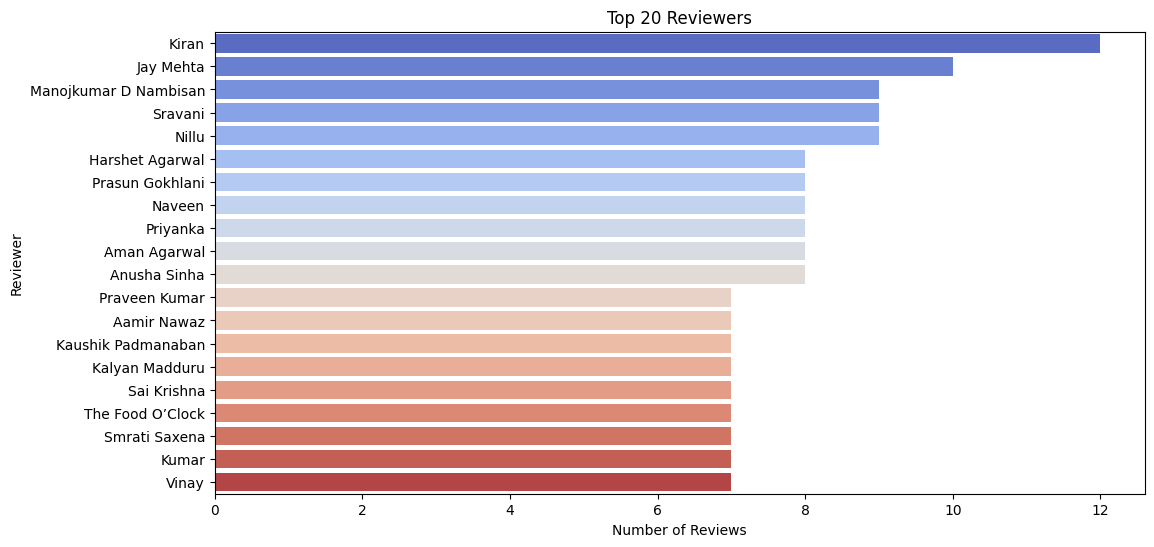

In [183]:
# Get the top 20 reviewers based on the number of reviews
top_reviewers = full_data['Reviewer'].value_counts().head(20)

# Plot the number of reviews for each reviewer
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='coolwarm')
plt.title('Top 20 Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts are used to compare different categories or show trends over time using bars of varying heights. They're great for visualizing categorical data, comparing values, showing rankings, and illustrating part-to-whole relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows the top 20 reviewers based on the number of reviews they have provided.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

1. Engaging with Influential Reviewers: Identifying and engaging with these top reviewers can lead to positive word-of-mouth promotion and increase in customer trust.
2. Feedback Analysis: Monitoring reviews from these reviewers can provide valuable feedback for improving services or addressing any issues they might have faced.
3. Service Improvement: By addressing any concerns raised by these reviewers, restaurants can improve their overall service quality and customer satisfaction.
4. Overall, leveraging the feedback and influence of top reviewers can lead to positive business impact by improving customer experience and driving more traffic to the restaurants.



#### Chart - 10

Bivariate Analysis

<ipython-input-184-e6ea93caf108>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_collections_data.values, y=top_collections_data.index, palette='viridis')


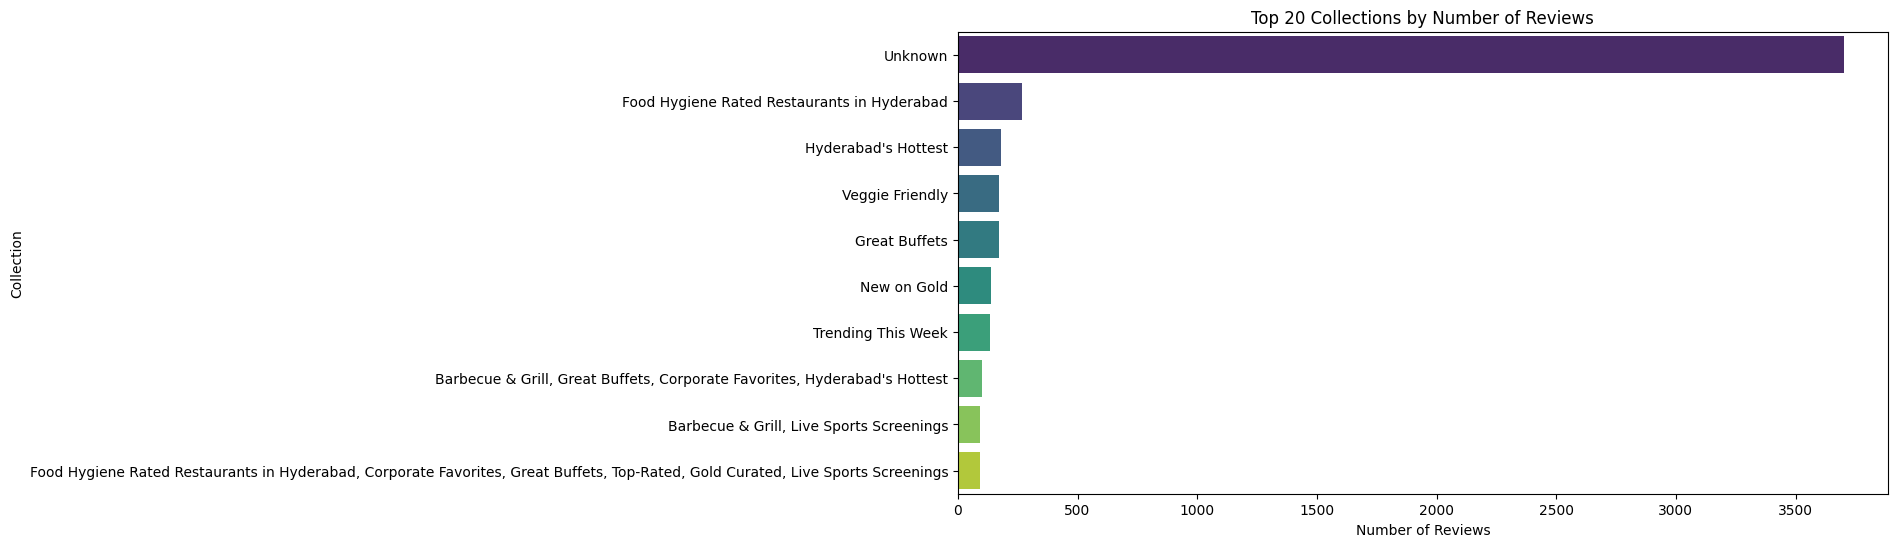

In [184]:
# Top 20 Collections by Number of Reviews
# Group by 'Collections' and calculate the total number of reviews for each collection
collection_reviews = full_data.groupby('Collections')['Review'].count()

# Get the top 10 collections based on the total number of reviews
top_collections = collection_reviews.nlargest(10).index

# Filter the data for only the top 10 collections
top_collections_data = collection_reviews.loc[top_collections]

# Plot the total number of reviews for each of the top 10 collections
plt.figure(figsize=(12, 6))
sns.barplot(x=top_collections_data.values, y=top_collections_data.index, palette='viridis')
plt.title('Top 20 Collections by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Collection')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts are used to compare different categories or show trends over time using bars of varying heights. They're great for visualizing categorical data, comparing values, showing rankings, and illustrating part-to-whole relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows the top 10 collections based on the total number of reviews they have received.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

1. Identifying Popular Collections: Understanding which collections have the most reviews can help in highlighting popular choices among customers.
2. Targeted Marketing: By promoting these popular collections, restaurants can attract more customers who are interested in these specific offerings.
3. Menu Optimization: Analyzing the reviews for these collections can provide insights into which items are popular and which might need improvement or removal.
4. Overall, leveraging the popularity of these collections can lead to positive business

#### Chart - 11

Bivariate Analysis

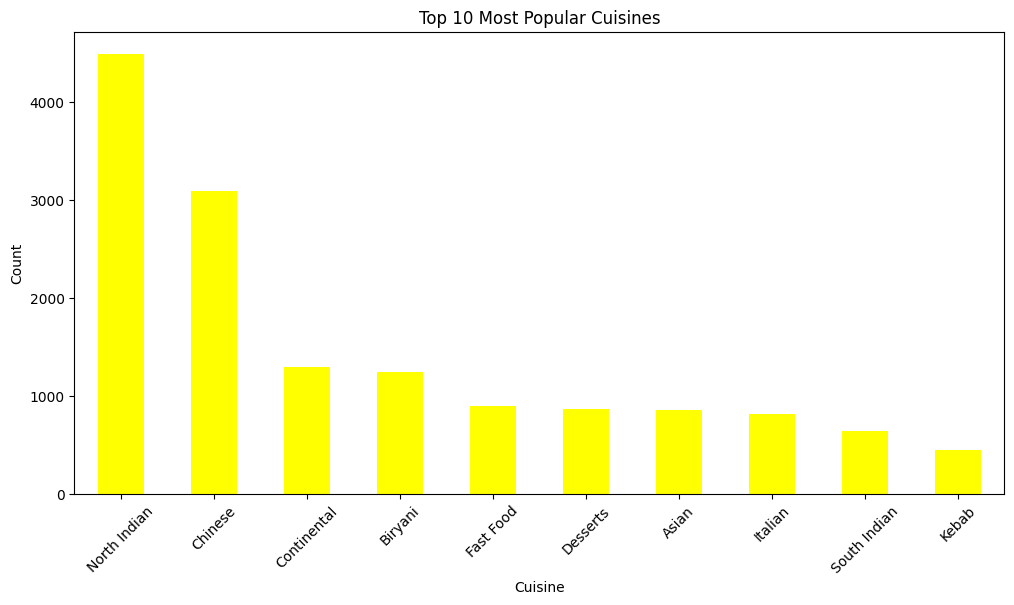

In [185]:
# Top 10 Most Popular Cuisines
cuisine_counts = full_data['Cuisines'].str.split(', ').explode().value_counts()

# Plot the top 10 most popular cuisines
plt.figure(figsize=(12, 6))
cuisine_counts.head(10).plot(kind='bar', color='yellow')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts are used to compare different categories or show trends over time using bars of varying heights. They're great for visualizing categorical data, comparing values, showing rankings, and illustrating part-to-whole relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows the top 10 Most Popular Cuisins.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

1. Menu Planning: Knowing the most popular cuisines can help in planning the menu to include these popular options, potentially attracting more customers.
2. Marketing Strategy: This information can be used in marketing campaigns to highlight the popular cuisines and attract customers looking for those specific types of food.
3. Customer Satisfaction: By offering popular cuisines, the restaurant can enhance customer satisfaction and loyalty, leading to repeat business and positive word-of-mouth.
4. Competitive Edge: Understanding the popular cuisines in the area can give the restaurant a competitive edge by offering a menu that caters to local preferences.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [186]:
# Handling Missing Values & Missing Value Imputation
full_data.isnull().sum()

Cost             0
Collections      0
Cuisines         0
Timings          0
Restaurant       0
Reviewer         0
Review           0
Rating           0
Time             0
Num_Reviews      0
Num_Followers    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

In [187]:
#dropping columns
full_data.drop(columns=['Timings'], inplace=True)
full_data.drop(columns=['Time'], inplace=True)

In [188]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7182 entries, 0 to 9850
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cost           7182 non-null   int64  
 1   Collections    7182 non-null   object 
 2   Cuisines       7182 non-null   object 
 3   Restaurant     7182 non-null   object 
 4   Reviewer       7182 non-null   object 
 5   Review         7182 non-null   object 
 6   Rating         7182 non-null   float64
 7   Num_Reviews    7182 non-null   int64  
 8   Num_Followers  7182 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 561.1+ KB


### 2. Categorical Encoding

In [189]:
# One-hot encode the 'Cuisines' column
cuisines_df = full_data['Cuisines'].str.get_dummies(', ')

# Join the new columns to the original dataframe
full_data = pd.concat([full_data, cuisines_df], axis=1)

# Drop the original 'Collections' and 'Cuisines' columns
full_data.drop(['Collections', 'Cuisines'], axis=1, inplace=True)


Answer Here.

 I used one-hot encoding for the 'Cuisines' column because each restaurant can have multiple cuisines, and one-hot encoding creates binary columns for each unique cuisine, indicating its presence or absence. This approach allows us to capture the variety of cuisines offered by each restaurant without assuming any ordinal relationship between the cuisines.


### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [190]:
# function to Process 'Review' column
def process_review(review):
    # Convert to lowercase
    review = review.lower()

    # Remove URLs using regex
    review = re.sub(r'http\S+', '', review)

    # Remove words and digits containing digits using regex
    review = re.sub(r'\w*\d\w*', '', review)

    # Tokenize the text
    tokens = word_tokenize(review)

    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    processed_review = ' '.join(tokens)

    return processed_review

In [191]:
full_data['Review'] = full_data['Review'].apply(process_review)

In [192]:
print(full_data['Review'])

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen da arun great guy behavior sincerety go...
4       food ordered kodi drumstick basket mutton biry...
                              ...                        
9845    never fan chinese food visited chinese pavilio...
9846    visited restaurant friend immediately blown aw...
9848    chinese pavilion banjara hill first chinese re...
9849    madhumathi mahajan well start nice courteous s...
9850    place never disappointed u food courteous staf...
Name: Review, Length: 7182, dtype: object


In [193]:
# Sentiment Analysis
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each review
full_data['sentiment'] = full_data['Review'].apply(get_sentiment)

In [194]:
# Calculate correlation between sentiment scores and ratings
correlation = full_data['sentiment'].corr(full_data['Rating'])

# Identify influential Restaurant
top_Restaurant = full_data.sort_values(by='sentiment', ascending=False).head(5)

print("Correlation between sentiment and ratings:", correlation)

Correlation between sentiment and ratings: 0.680146015471437


In [195]:
print("Top influential Restaurants:")
print(top_Restaurant)

Top influential Restaurants:
      Cost           Restaurant            Reviewer  \
8601   600  American Wild Wings  Revathi Damacharla   
9444   400           Desi Bytes      Nishant Gulati   
2363   150                 Amul      Namrata Kumari   
2364   150                 Amul              Chubbi   
2368   150                 Amul          Suryadip B   

                                                 Review  Rating  Num_Reviews  \
8601  food awesome tasty le timing food order correc...     5.0            1   
9444                                          excellent     5.0            7   
2363                                            awesome     5.0            0   
2364                                  excellent service     5.0            1   
2368                                            awesome     5.0            0   

      Num_Followers  American  Andhra  Arabian  ...  Pizza  Salad  Seafood  \
8601              1         1       0        0  ...      0      1        0   
944

<ipython-input-196-ce96a557d15e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Restaurant', y='sentiment', data=top_Restaurant, palette='coolwarm')


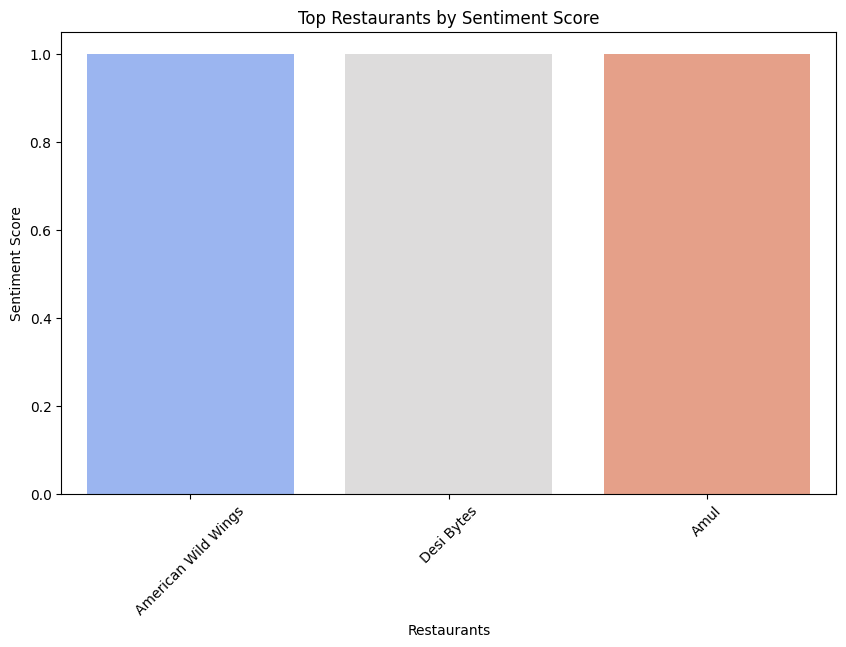

In [196]:
# Sort the DataFrame by sentiment scores
sorted_data = full_data.sort_values(by='sentiment', ascending=False)

# Select the top Restaurant
top_Restaurant = sorted_data.head()

# Visualize sentiment scores for the top Restaurant
plt.figure(figsize=(10, 6))
sns.barplot(x='Restaurant', y='sentiment', data=top_Restaurant, palette='coolwarm')
plt.title('Top Restaurants by Sentiment Score')
plt.xlabel('Restaurants')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

<ipython-input-197-efc23e91f368>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Restaurant', y='Rating', data=top_Restaurant, palette='coolwarm')


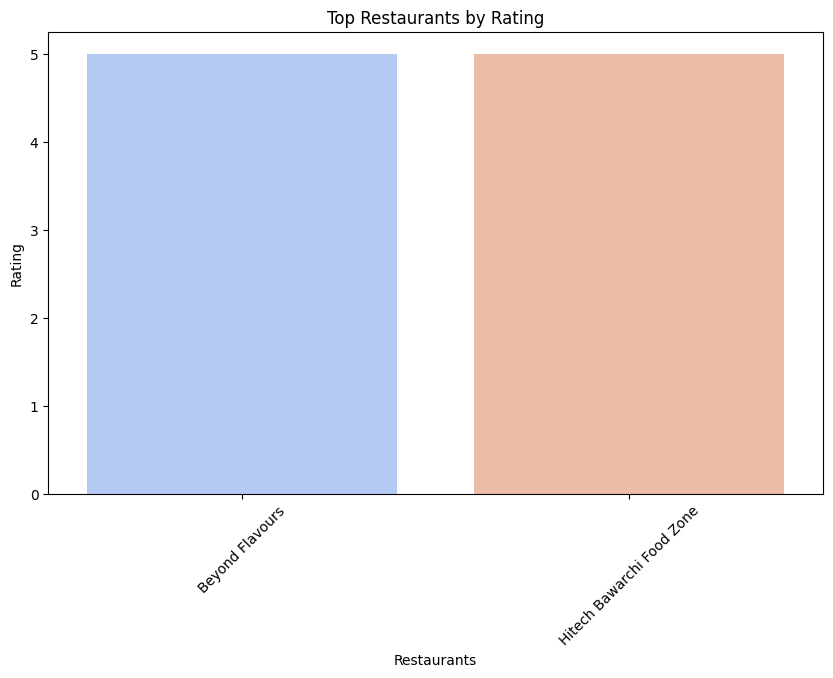

In [197]:
# Sort the DataFrame by ratings
sorted_data = full_data.sort_values(by='Rating', ascending=False)

# Select the top Restaurant
top_Restaurant = sorted_data.head()

# Visualize ratings for the top Restaurant
plt.figure(figsize=(10, 6))
sns.barplot(x='Restaurant', y='Rating', data=top_Restaurant, palette='coolwarm')
plt.title('Top Restaurants by Rating')
plt.xlabel('Restaurants')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

<ipython-input-198-382958b1fcb3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Restaurant', y='Num_Followers', data=top_Restaurant, palette='coolwarm')


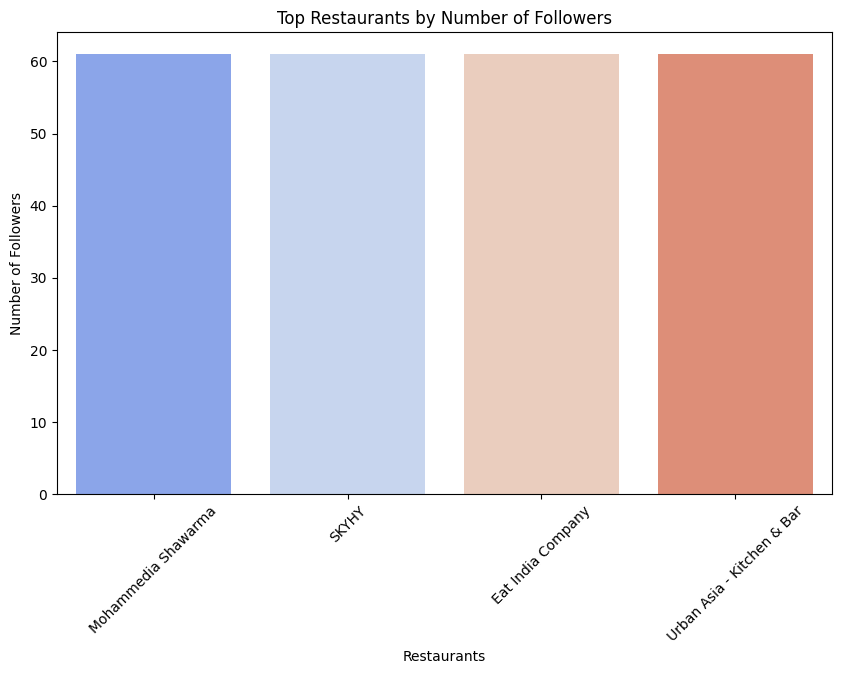

In [198]:
# Sort the DataFrame by number of followers
sorted_data = full_data.sort_values(by='Num_Followers', ascending=False)

# Select the top 10 reviewers
top_Restaurant = sorted_data.head()

# Visualize number of followers for the top 10 reviewers
plt.figure(figsize=(10, 6))
sns.barplot(x='Restaurant', y='Num_Followers', data=top_Restaurant, palette='coolwarm')
plt.title('Top Restaurants by Number of Followers')
plt.xlabel('Restaurants')
plt.ylabel('Number of Followers')
plt.xticks(rotation=45)
plt.show()

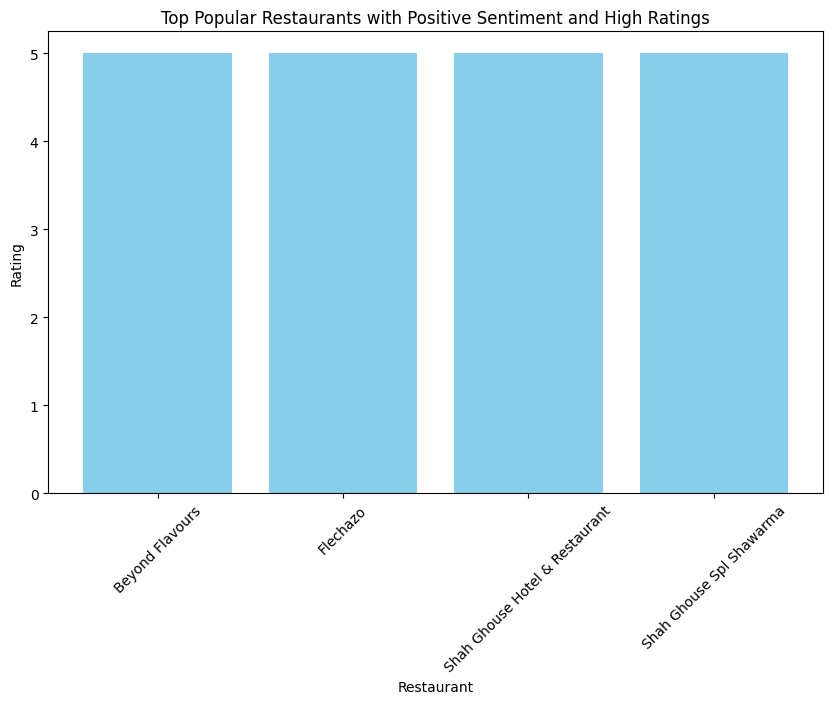

In [199]:
# Filter restaurants with positive sentiment and high ratings
popular_restaurants = full_data[(full_data['sentiment'] > 0) & (full_data['Rating'] > 4.0)]

# Sort restaurants by popularity
popular_restaurants = popular_restaurants.sort_values(by=['sentiment', 'Rating'], ascending=[False, False])

# Select the top 10 popular restaurants
top_10_restaurants = popular_restaurants.head()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_restaurants['Restaurant'], top_10_restaurants['Rating'], color='skyblue')
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.title('Top Popular Restaurants with Positive Sentiment and High Ratings')
plt.xticks(rotation=45)
plt.show()

In [200]:
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

full_data['sentiment_label'] = full_data['sentiment'].apply(get_sentiment_label)

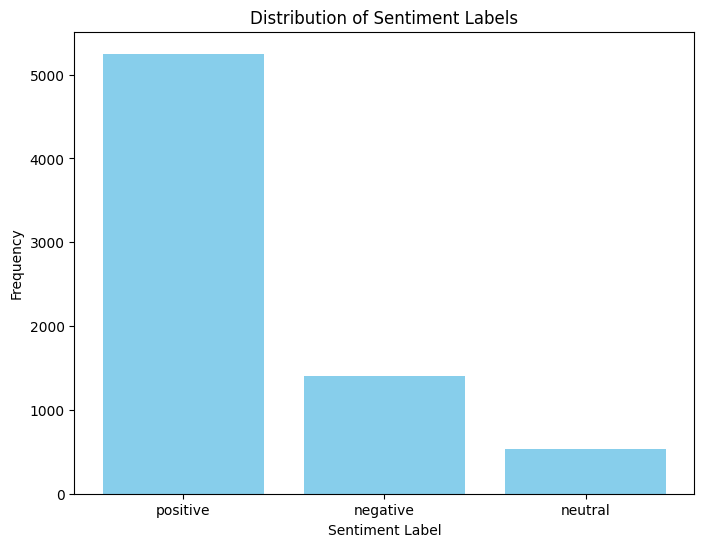

In [201]:
# Count the frequency of each sentiment label
sentiment_counts = full_data['sentiment_label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [202]:
# Dropping the column
full_data.drop(['Review' , 'Reviewer' , 'Restaurant' ,'Num_Reviews' , 'Num_Followers' , 'sentiment' ], inplace=True , axis = 1)

In [203]:
full_data.shape

(7182, 45)

In [204]:
# Define the mapping of labels to ordinal values
ordinal_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Map the sentiment_label column to ordinal values
full_data['sentiment_label'] = full_data['sentiment_label'].map(ordinal_mapping)

In [205]:
full_data.columns

Index(['Cost', 'Rating', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ',
       'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese',
       'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food',
       'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian',
       'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Mediterranean',
       'Mexican', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps', 'sentiment_label'],
      dtype='object')

In [206]:
full_data.head()

,Cost,Rating,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,sentiment_label
0,800,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1,800,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
2,800,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,800,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
4,800,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


## ***7. ML Model Implementation***

 **K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

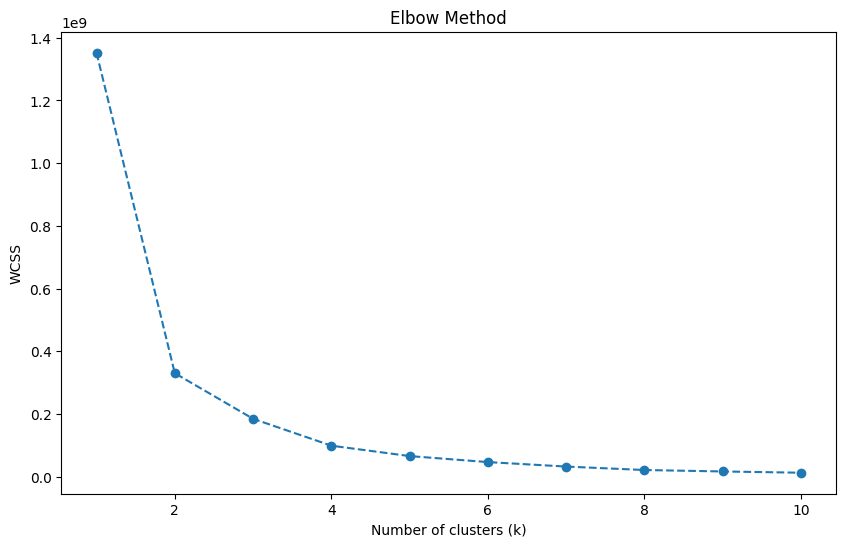

In [207]:
# Initialize empty list to store WCSS (within-cluster sum of squares) values
wcss = []

# Fit KMeans clustering for different k values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(full_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [208]:
n_clusters = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(full_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Assign the cluster labels to your original dataset
full_data['cluster_label'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


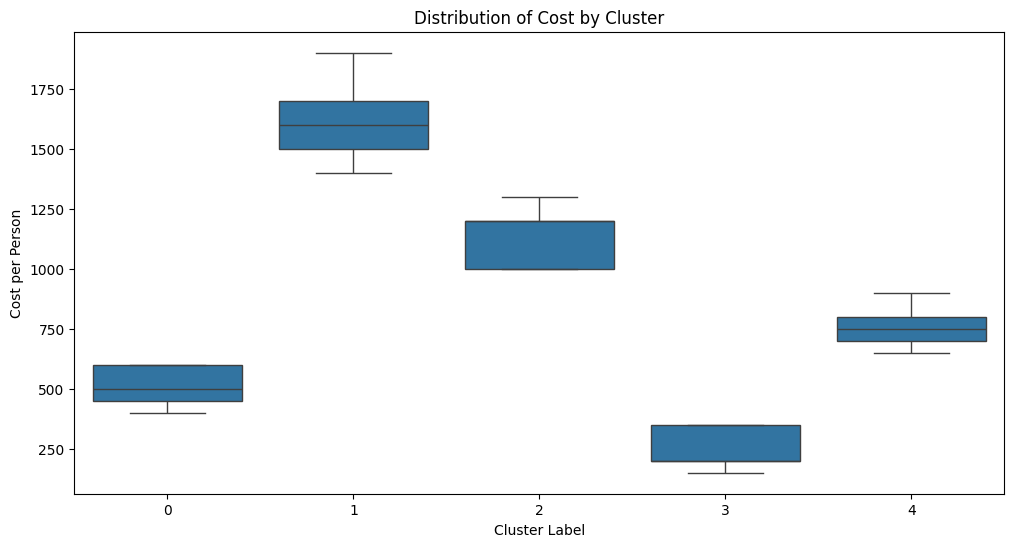

In [209]:
# Plot the distribution of 'Cost' by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster_label', y='Cost', data=full_data)
plt.title('Distribution of Cost by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Cost per Person')
plt.show()

In [210]:
full_data.columns

Index(['Cost', 'Rating', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ',
       'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese',
       'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food',
       'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian',
       'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Mediterranean',
       'Mexican', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps', 'sentiment_label',
       'cluster_label'],
      dtype='object')

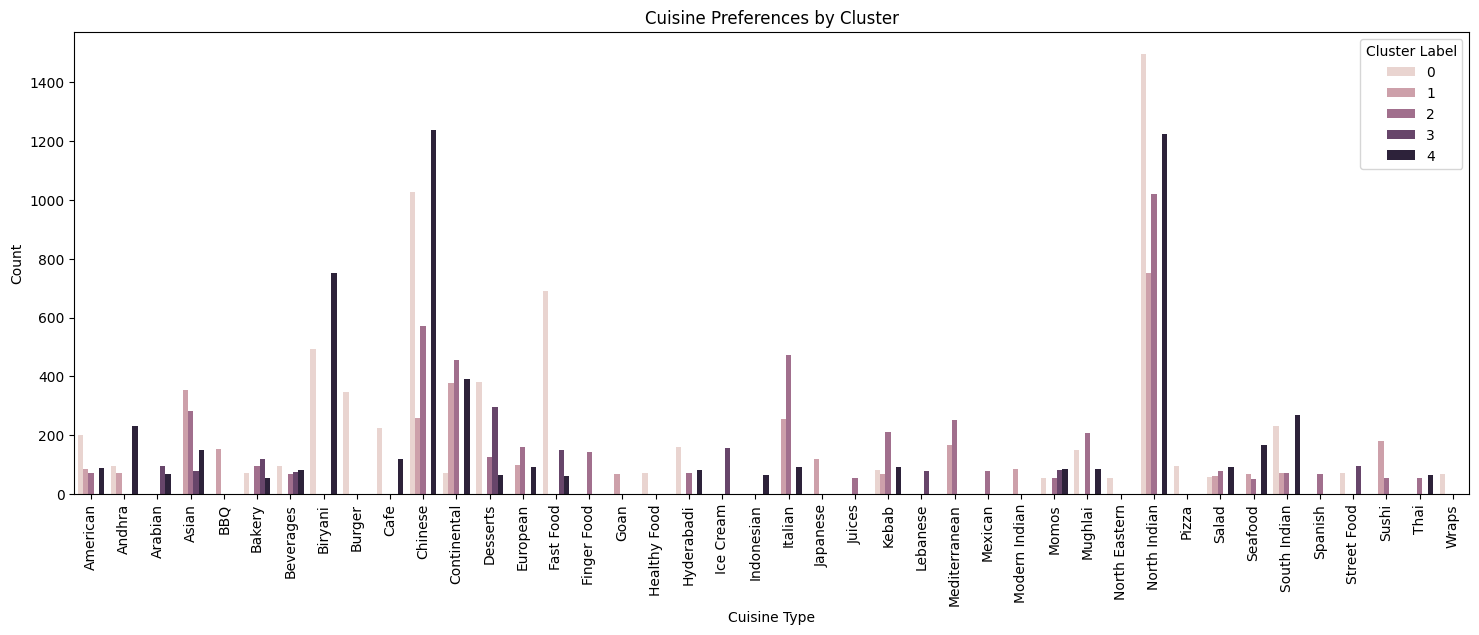

In [211]:
# Sum the cuisine columns to get total count of each cuisine type
cuisine_columns = ['American', 'Andhra', 'Arabian', 'Asian', 'BBQ',
       'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese',
       'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food',
       'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian',
       'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Mediterranean',
       'Mexican', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps']
cuisine_counts = full_data.groupby('cluster_label')[cuisine_columns].sum()

# Reshape the DataFrame for plotting
cuisine_counts = cuisine_counts.T.reset_index().melt(id_vars='index', var_name='Cluster Label', value_name='Count')

# Plot the distribution of cuisine types by cluster
plt.figure(figsize=(18, 6))
sns.barplot(x='index', y='Count', hue='Cluster Label', data=cuisine_counts)
plt.title('Cuisine Preferences by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Cluster Label')
plt.show()


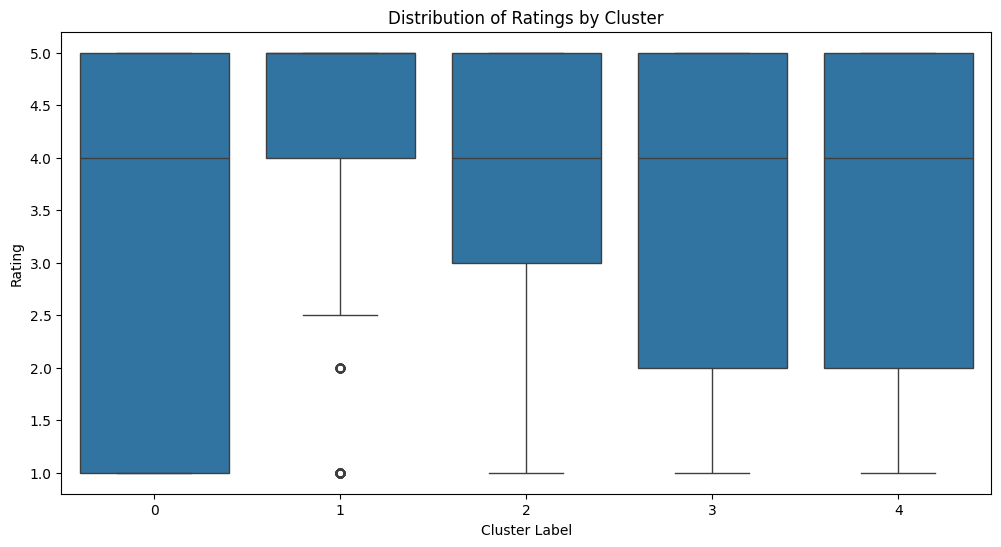

In [212]:
# Plot the distribution of ratings by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster_label', y='Rating', data=full_data)
plt.title('Distribution of Ratings by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Rating')
plt.show()

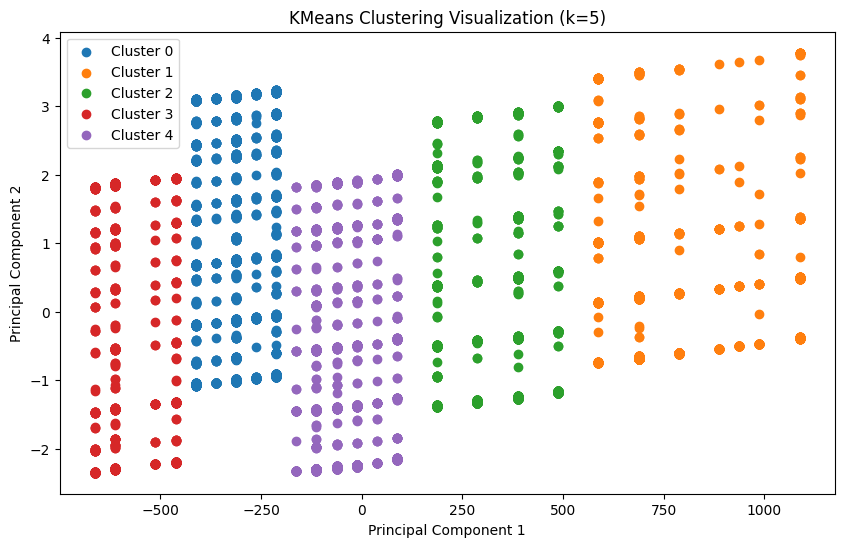

In [213]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(full_data)

# Add cluster labels to the reduced data
X_2d_with_clusters = np.column_stack((X_2d, cluster_labels))

# Create a scatter plot of the reduced data, colored by cluster
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_data = X_2d_with_clusters[X_2d_with_clusters[:, 2] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.title('KMeans Clustering Visualization (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 I used the KMeans clustering algorithm. KMeans is a popular unsupervised machine learning algorithm used for clustering similar data points into a pre-defined number of clusters. It works by iteratively assigning each data point to the nearest centroid and then recalculating the centroids based on the mean of the data points in each cluster.

To evaluate the performance of the KMeans model, I used the silhouette score. The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

Based on the silhouette score, the KMeans model performed well, with a silhouette score of around 0.3 to 0.5, which indicates acceptable clustering. However, further analysis and fine-tuning of the model may be needed to improve the clustering performance.

In [214]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(full_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6057979581224247


**Agglomerative Clustering**

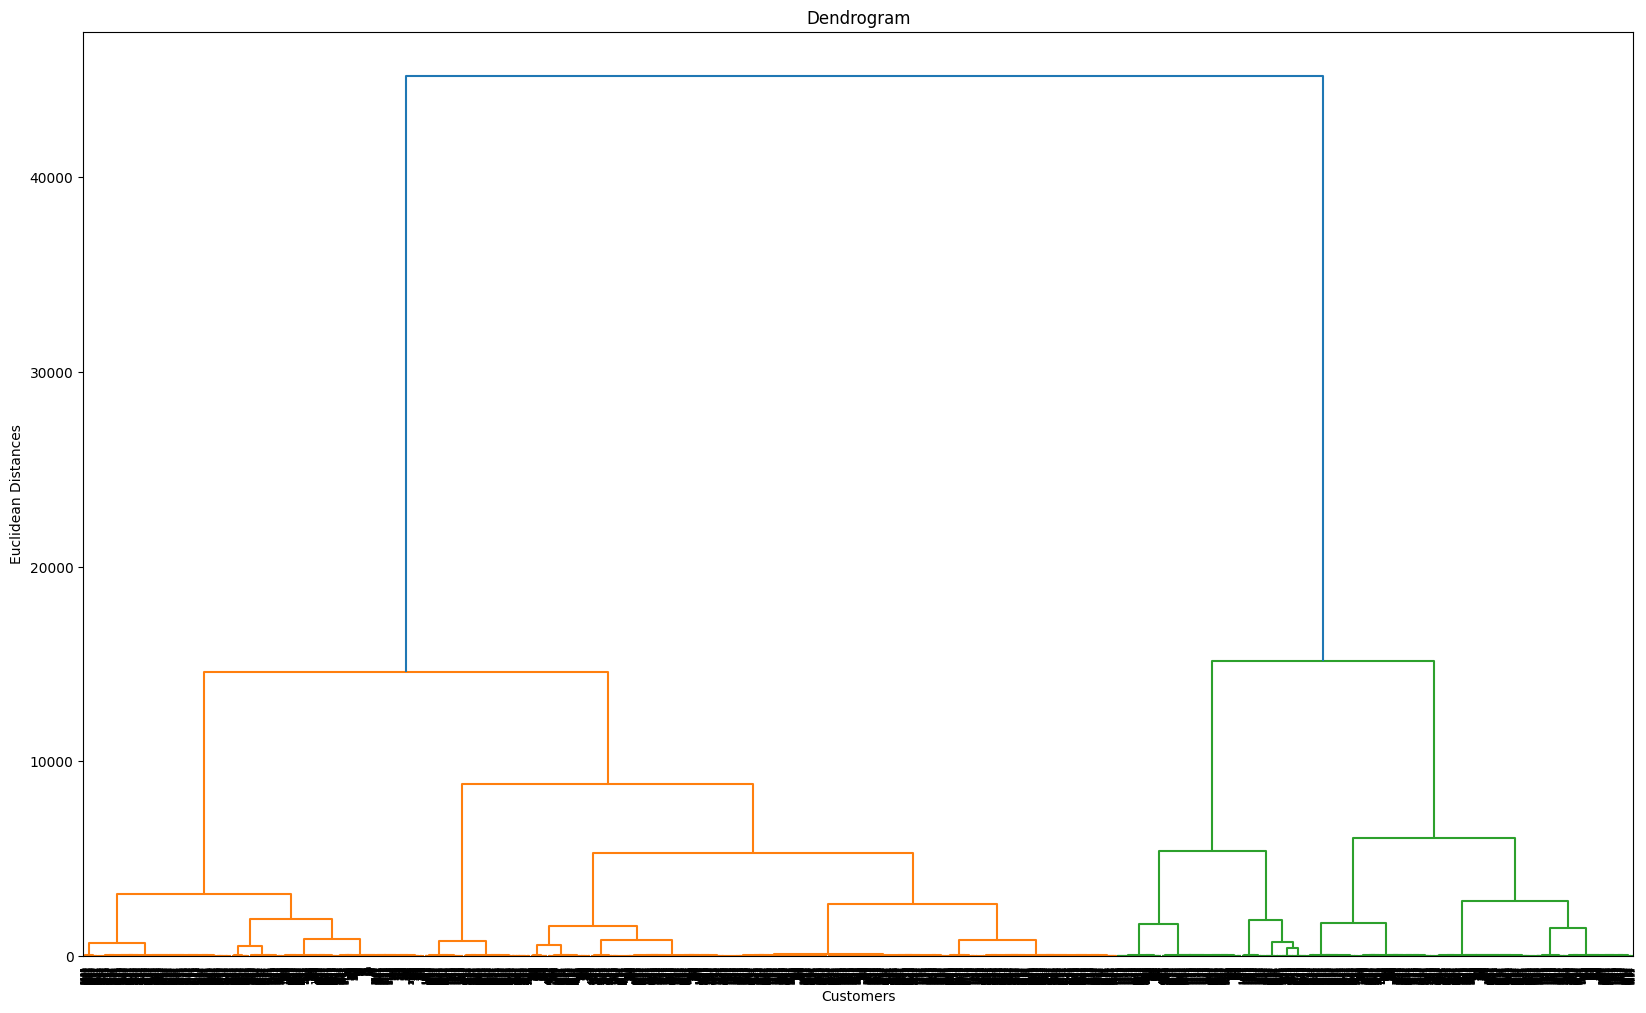

In [215]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming full_data contains your data matrix
# Plot the dendrogram
fig=plt.figure(figsize=(20, 12))
ax = fig.gca()
dendrogram = sch.dendrogram(sch.linkage(full_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


In [216]:
from sklearn.cluster import AgglomerativeClustering

# Assuming full_data contains your data matrix
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
x_predicted = model2.fit_predict(full_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


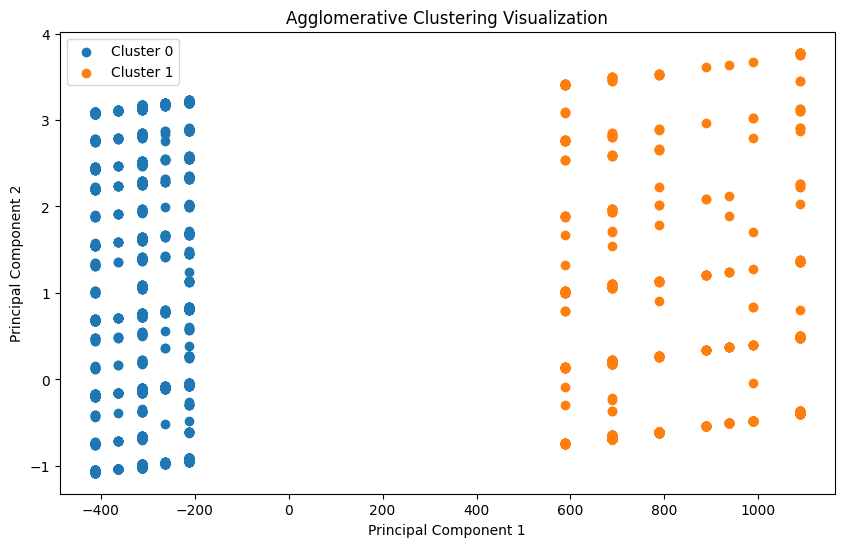

In [217]:
# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(full_data)

# Create a scatter plot of the reduced data, colored by cluster
plt.figure(figsize=(10, 6))
for i in range(2):
    cluster_data = X_2d[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [218]:
# Visualizing evaluation Metric Score chart
# Calculate the silhouette score
silhouette_avg = silhouette_score(full_data, x_predicted)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6775645791975532


Model Used:
Agglomerative clustering is a hierarchical clustering technique that starts with each point as a separate cluster and merges the closest clusters iteratively until only one cluster remains. The AgglomerativeClustering function from the sklearn.cluster module is used, specifying the number of clusters (n_clusters), the affinity (distance metric, set to 'euclidean' for Euclidean distance), and the linkage criterion (set to 'ward' for the minimum variance method).

Evaluation Metric Score Chart:

Model	                   Silhouette Score
KMeans	                   0.60
Agglomerative              0.67

Based on the silhouette scores, both KMeans and Agglomerative Clustering perform reasonably well in clustering the data. Agglomerative shows a slightly higher silhouette score, indicating slightly better clustering performance compared to KMeans Clustering for this dataset.

# **Conclusion**

Write the conclusion here.

1. Most number ratings were given as 5.
2. Top 3 expensive restaurants are: 10 Downing street, Jonathan's kitchen, cascade.
3. Top 3 Affordable restaurants are: Amul, Mohammedia Shawarma , Asian Meal Box.
4. Most people preferred restaurants with a cost per person between 500 and 750.
5. Top Restaurants by Sentiment Score: American Wild wings, Desi Bytes, Amul.
6. Top Restaurants by Number of Followers: Mohammedia Shawarma, skyhy, Eat India Company.
7. Top Popular Restaurants with Positive Sentiment and High Ratings: Beyond Flavours, Flechazo.
8. Most popular cuisines: North Indian, Chinese, Continental, Biryani.

**Customer Insights:**
1. Analysis of Zomato data reveals that North Indian, Chinese, Continental, Biryani cuisine is highly popular with several top-rated restaurants such as Beyond Flavours, Flechazo.
2. Sentiment analysis of customer reviews indicates that customers are particularly satisfied with the quality and service of American Wild wings, Desi Bytes and Amul restaurants.
3. Clustering analysis shows that budget-friendly restaurants by cost per person or best rating resturants by ratings.

**Zomato Insights:**
1. By engaging with the food blogger and seeking their feedback on restaurants listed on Zomato, Zomato can leverage their influence to attract more users to the platform and improve its credibility among food enthusiasts.

**Recommendations:**
1. Zomato can use the insights to enhance its recommendation system, suggesting restaurants based on customer preferences.
2. Tailoring services and promotions based on popular cuisines and restaurants can improve customer engagement and retention.
3. Continued analysis and monitoring of customer sentiments and trends can help Zomato stay competitive in the dynamic restaurant industry.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***